# **Telco Customer Churn Data Analysis & ML Model**

##### **Created By: Christofer Alexander Kumentas**

Notebook Content

- Problem Statement
- Data Understanding
- Exploratory Data Analysis
- Preprocessing
- Methodology (Modeling/Analysis)
- Conclusion and Recommendation

### **Business Problem Understanding**

**Context**<br>
Di industri telekomunikasi yang sangat kompetitif, banyak penyedia layanan menawarkan beragam layanan termasuk paket ponsel, layanan internet, dan TV kabel. Persaingan yang ketat ini menjadi tantangan besar bagi perusahaan telekomunikasi dalam mempertahankan pelanggan. Perusahaan-perusahaan ini bergantung pada model pendapatan berlangganan, di mana pelanggan berkomitmen pada kontrak atau melakukan pembayaran reguler untuk layanan. Perpindahan pelanggan dapat berdampak langsung pada pendapatan perusahaan.

Pelanggan mungkin berhenti berlangganan layanan telekomunikasi karena berbagai alasan, termasuk ketidakpuasan dengan kualitas layanan, harga yang tinggi, penawaran lebih menarik dari pesaing, atau masalah teknis. Sifat dinamis dan terus berubahnya preferensi pelanggan dan kondisi pasar menegaskan perlunya pendekatan proaktif dalam mempertahankan pelanggan.

Perusahaan telekomunikasi mengandalkan wawasan yang didapat dari analisis perpindahan pelanggan untuk merancang dan menerapkan strategi retensi pelanggan. Strategi ini sering meliputi peningkatan kualitas layanan untuk memenuhi atau melebihi harapan pelanggan, peluncuran program loyalitas pelanggan untuk membina hubungan yang langgeng, menyesuaikan penawaran yang dipersonalisasi sesuai dengan preferensi individu, dan memastikan penyelesaian masalah pelanggan yang cepat dan efisien. Di lanskap persaingan yang ketat ini, memahami perilaku pelanggan dan mengatasi perpindahan pelanggan dengan strategis sangat penting untuk pertumbuhan dan profitabilitas berkelanjutan perusahaan telekomunikasi.

**Problem Statement**

Perusahaan perlu mengidentifikasi faktor-faktor utama yang menyebabkan pelanggan beralih dari layanan mereka. Hal ini bertujuan untuk merumuskan strategi yang efektif dalam mempertahankan pelanggan dan mengurangi angka churn. Dengan ini, perusahaan dapat meningkatkan penjualan, mempertahankan pangsa pasar pelanggan, dan mengoptimalkan faktor-faktor yang menjadi daya tarik utama layanan mereka.

**Goals**

Berdasarkan permasalahan tersebut, perusahaan bermaksud untuk mengembangkankemampuan untuk memprediksi churn pelanggan. Melalui hasil prediksi ini, perusahaan berharap dapat mengidentifikasi pelanggan yang berisiko churn atau tidak churn. Hasil ini akan membantu perusahaan untuk merumuskan strategi yang lebih baik.

Selain itu, perusahaan dapat menggali lebih dalam mengenai faktor-faktor yang mempengaruhi keputusan pelanggan dalam churn. Dengan pemahasan tersebut perusahaan dapat merancang sebuah strategi yang baik pada sisi product untuk mempertahankan customer base mereka. 

**Analytic Approach**

Jadi yang akan dilakukan adalah menganalisis data untuk menemukan faktor yang menyebabkan customer churn dari perusahaan telco dan yang tidak churn.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan telco untuk dapat memprediksi probabilitas seorang customer akan churn atau tidak.

**Metric Evaluation**

- True Negative (TN): Jumlah pengamatan yang benar-benar diprediksi tidak akan churn dan sebenarnya tidak churn.

- False Positive (FP): Jumlah pengamatan yang diprediksi akan churn tetapi sebenarnya tidak churn. Ini juga dikenal sebagai kesalahan tipe I.

- False Negative (FN): Jumlah pengamatan yang diprediksi tidak akan churn tetapi sebenarnya churn. Ini juga dikenal sebagai kesalahan tipe II.

- True Positive (TP): Jumlah pengamatan yang benar-benar diprediksi akan churn dan sebenarnya churn.

**Type 1 error: False Positive**
<br>
konsekuensi: Mengakibatkan pengeluaran tambahan untuk menjaga customer yang sebenarnya tidak perlu mendapatkan perhatian tambahan

**Type 2 error: False Ngative**
<br>
konsekuensi: Mengakibatkan kehilanggan customer karena tidak memberikan perhatian atau layanan tambahan kepada mereka

Berdasarkan konsekuensinya, untuk menghindari pengeluaran yang tidak diperlukan, seperti memberikan promo atau perhatian tambakan kepada pelanggan yang sebenarnya tidak akan churn. Kita akan membangun model yang akan fokus pada percision. Oleh karena itu, metric utama yang akan digunakan adalah F1-score.


### **Data Understanding**

Data Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


#### **Attribute Information**

| Attribute         | Data Type  | Description                                      |
|-------------------|------------|--------------------------------------------------|
| customerID        | Object     | Unique identifier for each customer.            |
| gender            | Object     | Customer's gender.                              |
| SeniorCitizen     | Int64      | Indicates if the customer is a senior citizen (1 for yes, 0 for no). |
| Partner           | Object     | Indicates if the customer has a partner.       |
| Dependents        | Object     | Indicates if the customer has dependents.      |
| tenure            | Int64      | Number of months the customer has been with the company. |
| PhoneService      | Object     | Indicates if the customer has a phone service. |
| MultipleLines     | Object     | Indicates if the customer has multiple phone lines. |
| InternetService   | Object     | Type of internet service subscribed by the customer. |
| OnlineSecurity    | Object     | Indicates if the customer has online security service. |
| OnlineBackup      | Object     | Indicates if the customer has online backup service. |
| DeviceProtection  | Object     | Indicates if the customer has device protection service. |
| TechSupport       | Object     | Indicates if the customer has tech support service. |
| StreamingTV       | Object     | Indicates if the customer has streaming TV service. |
| StreamingMovies   | Object     | Indicates if the customer has streaming movie service. |
| Contract          | Object     | Type of contract (e.g., month-to-month, one-year, two-year). |
| PaperlessBilling  | Object     | Indicates if the customer uses paperless billing. |
| PaymentMethod     | Object     | Payment method used by the customer. |
| MonthlyCharges    | Float64    | Monthly subscription fees paid by the customer. |
| TotalCharges      | Object     | Total charges paid by the customer. |
| Churn             | Object     | Indicates whether the customer has churned (yes or no). |


**The dataset includes information about:**

- **Customers who left within the last month** – *Churn column*

- **Services that each customer has signed up for** – *phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies*

- **Customer account information** – *how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges*

- **Demographic info about customers** – *gender, age range, and if they have partners and dependents*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(df.head(), df.tail())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### **Data Cleaning**

In [6]:
# drop customer ID
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Change totalcharges to numeric format 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce") 

# Change 0 and 1 from column SeniorCitizen to No and Yes
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
# check for missing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
missing_TotalCharges_row = df[df['TotalCharges'].isna()].index
missing_TotalCharges_row

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Solve missing values problem in TotalCharges column by filling it with median of TotalCharges values. (using median values because column distribution not normal)

In [12]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Check for missing value again
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# look up previously missing value rows which has been filled
df.loc[missing_TotalCharges_row]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1397.475,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1397.475,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,1397.475,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1397.475,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1397.475,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,1397.475,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1397.475,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1397.475,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,1397.475,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1397.475,No


In [14]:
# droping missing values
df.drop(df[df['TotalCharges'].isnull()].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(7043, 20)

### **EDA**

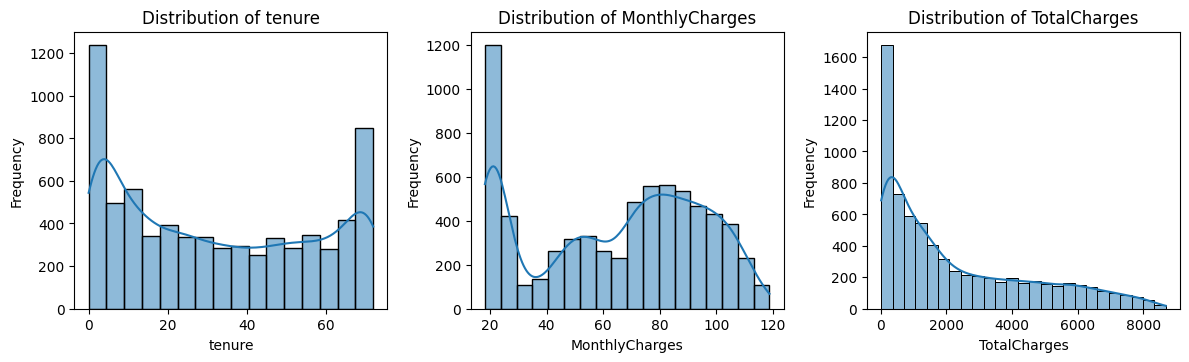

In [15]:
plt.figure(figsize=(12, 10))
pltnum = 1

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for column in num_cols:
    if column != 'SeniorCitizen':
        plt.subplot(3, 3, pltnum)
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        pltnum += 1

plt.tight_layout()
plt.show()


- **Tenure & MonthlyCharges (Bimodal Distribution)**:
Distribusi Bimodal pada kolom Tenure dan MonthlyCharges menunjukan adanya dua puncak atau kelompok nilai yang berbeda. Ini bisa menandakan adanya dua kelompok pelanggan yang bebeda dalam dataset, terkait dengan masa langganan (tenure) dan biaya bulanan (MonthlyCharges)

- Tenure: bisa ada dua kelompok pelanggan, misalnya, kelompok yang baru bergabung dalam waktu singkat dan kelom lain yang sudah menjadi pelanggan lebih lama. 
- MonthlyCharges: bisa menandakan ada dua kelompok pelanggan dengan biaya bulanan yang berbeda, misalnya satu kelompok bayar lebih murah dan yang lain bayar lebih mahal. 

- **TotalCharges(Positvely Skewed Distribution)**:
Distribusi ini menunjukan bahwa sebagian besar pelanggan cenderung memiliki total biaya yang relatif rendahm senebtara ada senjumlah yang kecil.

Note: Walaupun column 'SeniorCitizen' memiliki tipe data numerik, variable tersebut pada dasarnya bersifat categoric. Nilai 0 dan 1 pada kolom 'SeniorCitizen' mewakili dua kondisi, seperti 'No' dan 'Yes'. Oleh karena itu column tersebut diabaikan.

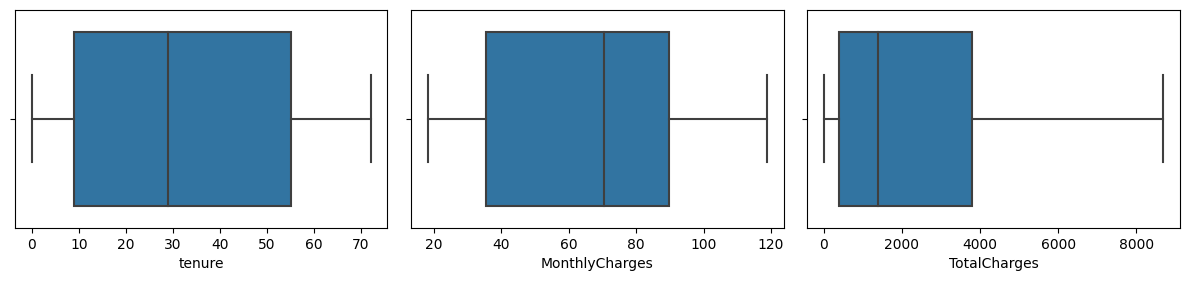

In [16]:
plt.figure(figsize=(12,8))
pltnum = 1
# filter columns that are numeric 
num_cols = df.select_dtypes(include=['int', 'float']).columns

for column in num_cols:
    if column != 'SeniorCitizen':
        plt.subplot(3, 3, pltnum)
        sns.boxplot(data=df, x=column)
        pltnum += 1
    
plt.tight_layout()
plt.show()

In [17]:
unique_cat_values_dict = {}

for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        unique_values_count = df[column].nunique()
        unique_cat_values_dict[column] = {'Count': unique_values_count, 'Values': unique_values}

cat_values_df = pd.DataFrame(unique_cat_values_dict).T
cat_values_df

,Count,Values
gender,2,"[Female, Male]"
SeniorCitizen,2,"[No, Yes]"
Partner,2,"[Yes, No]"
Dependents,2,"[No, Yes]"
PhoneService,2,"[No, Yes]"
MultipleLines,3,"[No phone service, No, Yes]"
InternetService,3,"[DSL, Fiber optic, No]"
OnlineSecurity,3,"[No, Yes, No internet service]"
OnlineBackup,3,"[Yes, No, No internet service]"
DeviceProtection,3,"[No, Yes, No internet service]"


In [18]:
unique_num_values_dict = {}

# Iterate through columns and store unique values in the dictionary
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        unique_values = df[column].unique()
        unique_values_count = df[column].nunique()
        unique_num_values_dict[column] = {'Count': unique_values_count, 'Values': unique_values}

num_values_df = pd.DataFrame(unique_num_values_dict).T
num_values_df

,Count,Values
tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
MonthlyCharges,1585,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,..."
TotalCharges,6531,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5..."


In [19]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


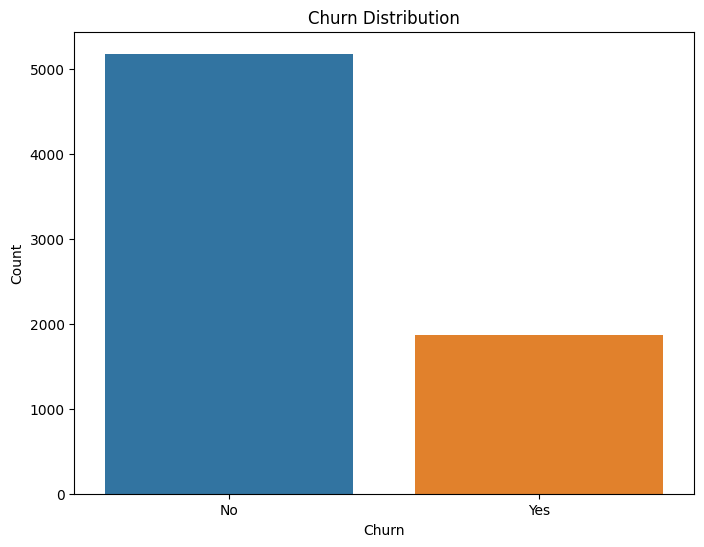

Churn value:


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

print("Churn value:")
df['Churn'].value_counts()

Porporsi No Churn lebih tinggi dibandingkan porsi yang Churn(Yes), Bias dari data akan menyebabkan hasil yang kurang akurat, terutama dalam mengidentifikasi pelanggan yang benar-benar mungkin berhenti berlangganan. 

Dapat dilakukan teknik oversampling atau undersampling untuk menyeimbangkan proporsi data anatra kedua values, sehingga model lebih seimbang dan akurat.

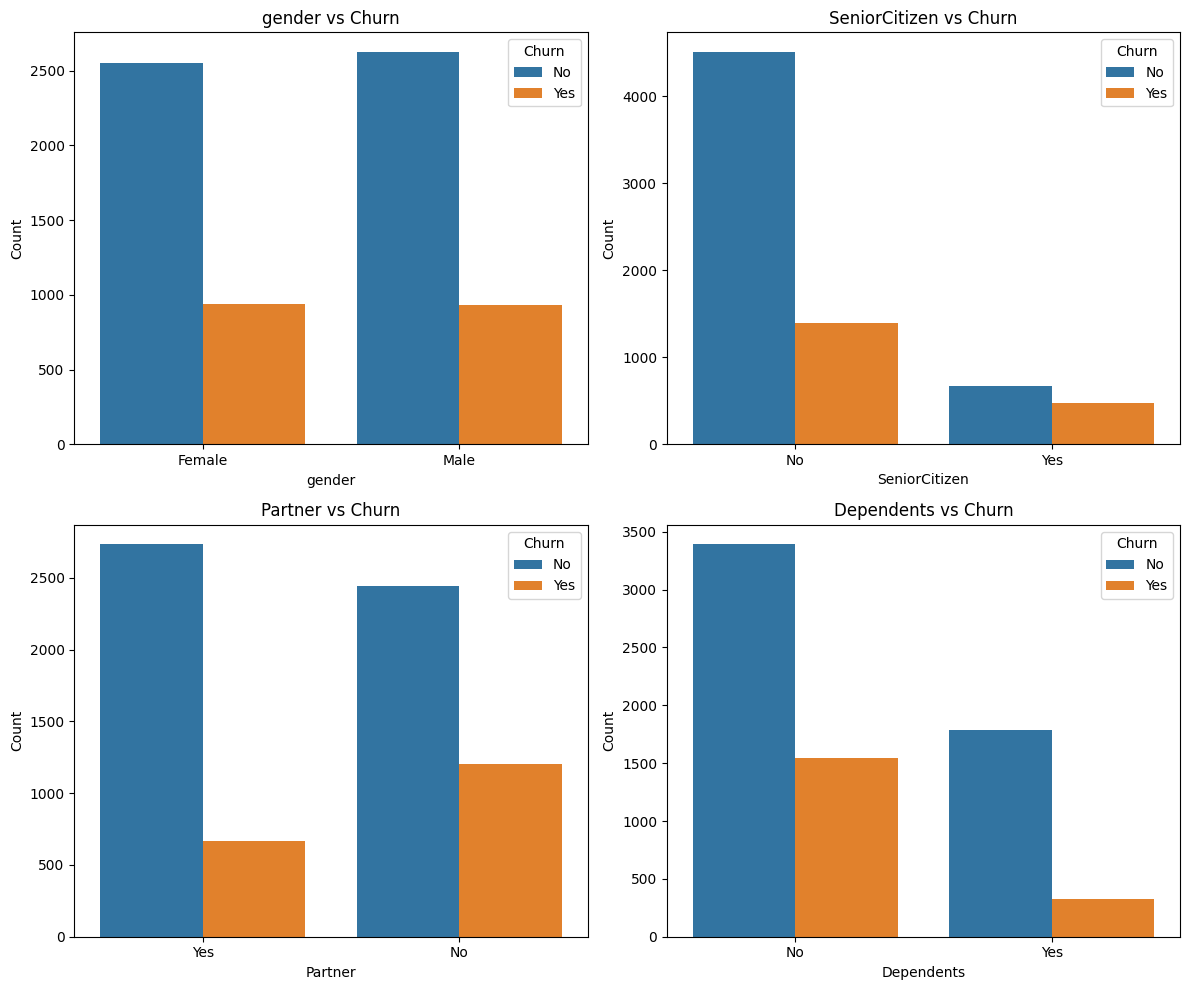

In [21]:
df_demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(12, 10))
for i, col in enumerate(df_demographic_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [22]:
for col in df_demographic_cols:
    churn_rates = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    print(f"Churn Rates by {col}")
    print(churn_rates.to_string(formatters={'No': '{:.2%}'.format, 'Yes': '{:.2%}'.format}))
    print("===========================")
    print()

Churn Rates by gender
Churn      No    Yes
gender              
Female 73.08% 26.92%
Male   73.84% 26.16%

Churn Rates by SeniorCitizen
Churn             No    Yes
SeniorCitizen              
No            76.39% 23.61%
Yes           58.32% 41.68%

Churn Rates by Partner
Churn       No    Yes
Partner              
No      67.04% 32.96%
Yes     80.34% 19.66%

Churn Rates by Dependents
Churn          No    Yes
Dependents              
No         68.72% 31.28%
Yes        84.55% 15.45%



**Analisi berdasarkan faktor demografis:**
- **Gender:**
    - Tingkat churn di antara pelangga pria dan wanita cenderung serupa, dengan pria sebanyak 26.16% dan wanita 26.92%. Tidak ada perbedaan signifikan dalam tingkat churn berdasarkan jenis kelamin. Menunjukan bahwa faktor jenis kelamin mungkin bukan faktor utama yang mempengaruhi keputusan Churn.
<br>

- **SeniorCitizen:**
    - Pelanggan yang merupakan SeinorCitizen memiliki tingkat Churn lebih tinggi sebesar 41.68% dibandingkan dengan mereka yang bukan sekitar 23.61%. Faktor Usianya tampaknya memiliki pengaruh signifikan dalam tingkat Churn, mungkin karena kebutuhan atau preferensi layanan yang berbeda
<br>

- **Partner:**
    - Pelanggan yang memiliki pasangan (married or in a relationship) menunjukkan tingkat churn yang lebih rendah (19.66%) dibandingkan dengan pelanggan yang tidak memiliki pasangan (32.96%). 
<br>

- **Dependents:**
    - Pelanggan yang memiliki dependents menunjukan tingkat churn yang lebih rendah 15.45% dibangdingkan dengan pelangga yang tidak memiliki dependets 31.28%. Ini bisa menunjukan bahwa keluarga bisa menjadi faktor peting yang mempengaruhi Churn.

Mengetahui bahwa faktor seperti usia dan status Partner & Dependents berperan dalam tingkat churn dapat membantu dalam pengembangan strategi retensi pelanggan yang lebih efektif. 

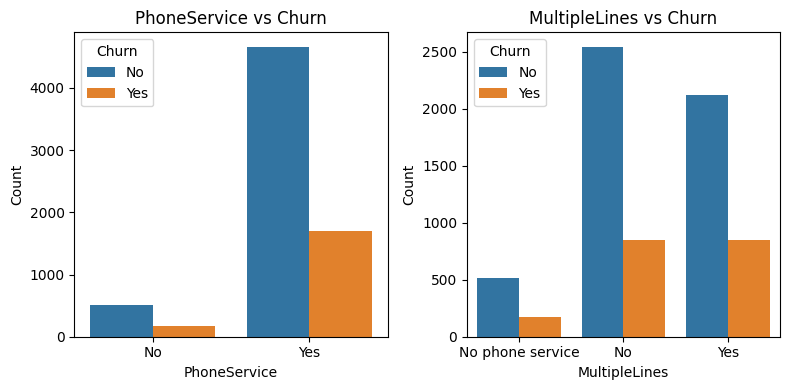

In [33]:
df_phone_service = ['PhoneService', 'MultipleLines']

plt.figure(figsize=(8, 4))
for i, col in enumerate(df_phone_service, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [34]:
for col in df_phone_service:
    churn_rates_phone_services = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    print(f"Churn Rates by {col}")
    print(churn_rates_phone_services.to_string(formatters={'No': '{:.2%}'.format, 'Yes': '{:.2%}'.format}))
    print("===========================")
    print()

Churn Rates by PhoneService
Churn            No    Yes
PhoneService              
No           75.07% 24.93%
Yes          73.29% 26.71%

Churn Rates by MultipleLines
Churn                No    Yes
MultipleLines                 
No               74.96% 25.04%
No phone service 75.07% 24.93%
Yes              71.39% 28.61%



- **PhoneService:**
    - Tidak ada perbedaan signifikan dalam tingkat churn antara pelanggan yang menggunakan layanan telpon(26.71%) dan yang tidak(24.93%)

- **MultipleLines:**
    - Pelanggan dengan layanan MultipleLines yang mengizinkan lebih dari satu saluran telpon cenderung memiliki tingkat churn lebih tinggi(28.61%) dibandingkan dengan yang tidak(25.04%) dan 24.93% bagi yang sama sekali tidak memiliki layanan telepon tambahan. Pengunaan layanan temabahan saluran telepon sedikit berkorelasi dengan tingkat churn yang lebih tinggi. 

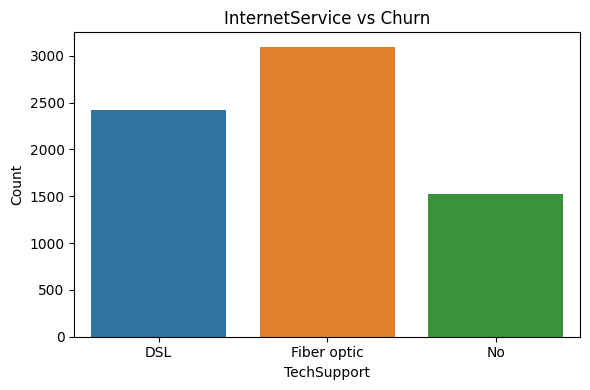

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='InternetService')
plt.title(f"InternetService vs Churn")
plt.xlabel(col)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print(df['InternetService'].value_counts())

- **"No"**: Menunjukan bahwa customer tidak memiliki layanan tersebut.
- **"Yes"**: Menunjukan bahwa customer berlangganan atau mengunakan layanan tertentu.
- **"No Internet Service"**: Menunjukan kategori/layanan yang khusus dengan internet. Bila customer memiliki No Internet Service, fitur yang terkait dengan internet tidak berlaku atau disediakan.

Perbedaan antara **"No"** dan **"No Internet Service"** ada pada konteks layanan yang terkait dengan internet. "No Internet Service" secara khusus merujuk pada situasi diaman customer tidak memilii konektivitas internet sama sekali, sehingga layanan yang berhubungan dengan interner menjadi tidak berlaku



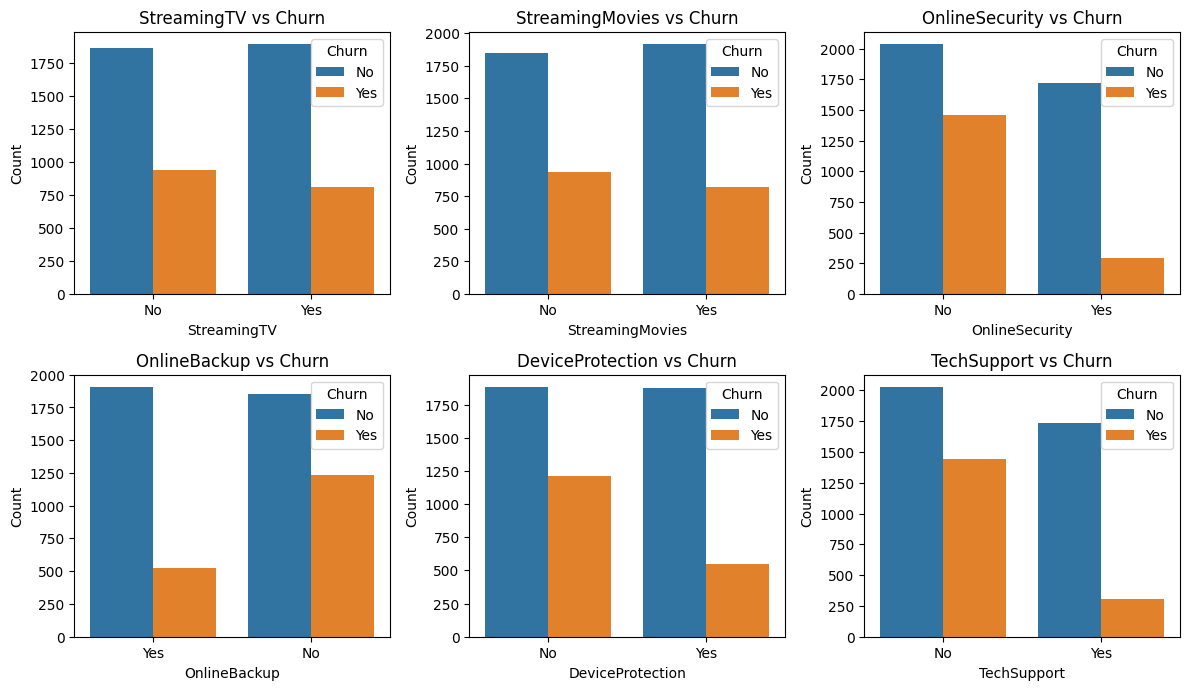

In [80]:
df_services = ['StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

plt.figure(figsize=(12, 10))
for i, col in enumerate(df_services, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df[df[col] != 'No internet service'], x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [81]:
df_services = ['StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

for col in df_services:
    # Filter out 'No internet service' rows before computing churn rates
    churn_rates_services = df[df[col] != 'No internet service'].groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    print(f"Churn Rates by {col}")
    print(churn_rates_services.to_string(formatters={'No': '{:.2%}'.format, 'Yes': '{:.2%}'.format}))
    print("===========================")
    print()


Churn Rates by StreamingTV
Churn           No    Yes
StreamingTV              
No          66.48% 33.52%
Yes         69.93% 30.07%

Churn Rates by StreamingMovies
Churn               No    Yes
StreamingMovies              
No              66.32% 33.68%
Yes             70.06% 29.94%

Churn Rates by OnlineSecurity
Churn              No    Yes
OnlineSecurity              
No             58.23% 41.77%
Yes            85.39% 14.61%

Churn Rates by OnlineBackup
Churn            No    Yes
OnlineBackup              
No           60.07% 39.93%
Yes          78.47% 21.53%

Churn Rates by DeviceProtection
Churn                No    Yes
DeviceProtection              
No               60.87% 39.13%
Yes              77.50% 22.50%

Churn Rates by TechSupport
Churn           No    Yes
TechSupport              
No          58.36% 41.64%
Yes         84.83% 15.17%



- **Streaming TV & Streaming Movies:**
    - Pelanggan yang menggunakan layanan streaming TV dan Streaming Movies memiliki tingkat churn yang lebih rendah namun tidak secara signifikan dengan pelanggan yang tidak menggunakan layanan tersebut.

- **Online Security, Online Backup, Device Protection, & Tech Support:**
    - Pelanggan yang menggunakan layanan keamanan online, backup online, perlindungan perangkat, dan layanan dukungan teknis cenderung memiliki tingkat churn yang jauh lebih rendah dibandingkan dengan pelanggan yang tidak menggunakan layanan ini. Hal ini menunjukkan bahwa adopsi layanan-layanan ini cenderung dapat mengurangi kecenderungan pelanggan untuk berhenti berlangganan.

- **Online Security & Tech Support:**
    - Layanan kemanan dan layanan dukungan teknis memiliki perbedaan churn rate paling signifkan. menandakan bahwa keamanan internet dan dukungan teknis membantu menurunkan tingkat churn. layanan ini memainkan peran penting dalam mempertahankan pelanggan.

Dapat dipertimbagkan untuk meningkatkan kualitias promosi layanan streaming dan Movies untuk mengurangi kecendrungan pelanggan untuk berhenti berlangganan. untuk service layanan lainnya bisa dilakukan upaya untuk mempertahankan retensi pelanggan.



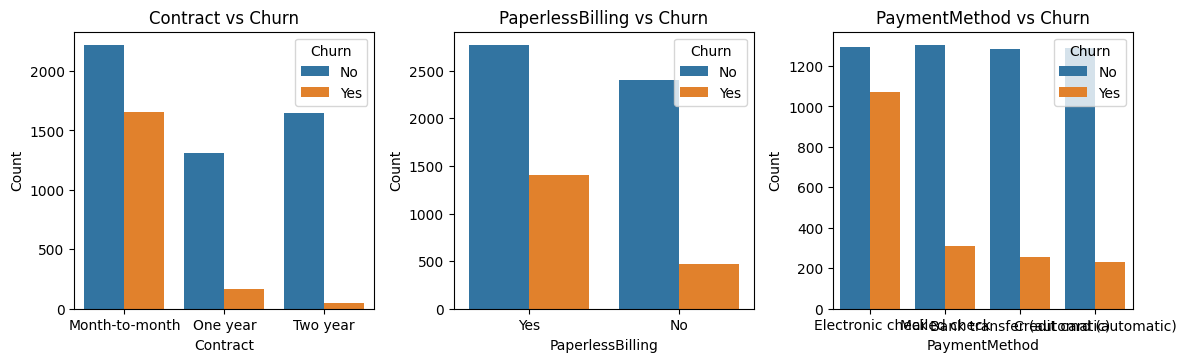

In [142]:
df_payment = ['Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(12, 10))
for i, col in enumerate(df_payment, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [143]:
for col in df_payment:
    churn_rates_payment = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    print(f"Churn Rates by {col}")
    print(churn_rates_payment.to_string(formatters={'No': '{:.2%}'.format, 'Yes': '{:.2%}'.format}))
    print("===========================")
    print()

Churn Rates by Contract
Churn              No    Yes
Contract                    
Month-to-month 57.29% 42.71%
One year       88.73% 11.27%
Two year       97.17%  2.83%

Churn Rates by PaperlessBilling
Churn                No    Yes
PaperlessBilling              
No               83.67% 16.33%
Yes              66.43% 33.57%

Churn Rates by PaymentMethod
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic) 83.29% 16.71%
Credit card (automatic)   84.76% 15.24%
Electronic check          54.71% 45.29%
Mailed check              80.89% 19.11%



**1. Contract:**
- Contract 'Month-to-month' memiliki tingkat Churn paling besar sekitar **42.71%**, yang jauh lebih tinggi dibandingkan dengan 'One year' (**11.27%**) dan 'Two year' (**2.83%**).
- Pelanggan dengan contract jangka pendek memiliki tingkat Churn lebih tinggi daripada yang memiliki contract jangka panjang 

**2. PeperlessBilling:**
- Cistomer yang menggunakan PaperlessBilling memiliki tingkat Churn yang lebih tinggi sebesar **33.57%** dibandingkan dengan customer yang tidak menggunakan PaperlessBilling (**16.33%**)

**3. PaymentMethod:**
- Metode pembayaran 'Electronic check' memiliki tingkat Churn yang sangat tinggi (**45.29%**) dibandingkan dengan 'Bank transfer' (**16.71%**), 'Credit card' (**15.24%**), dan 'Mailed check' (**19.11%**).

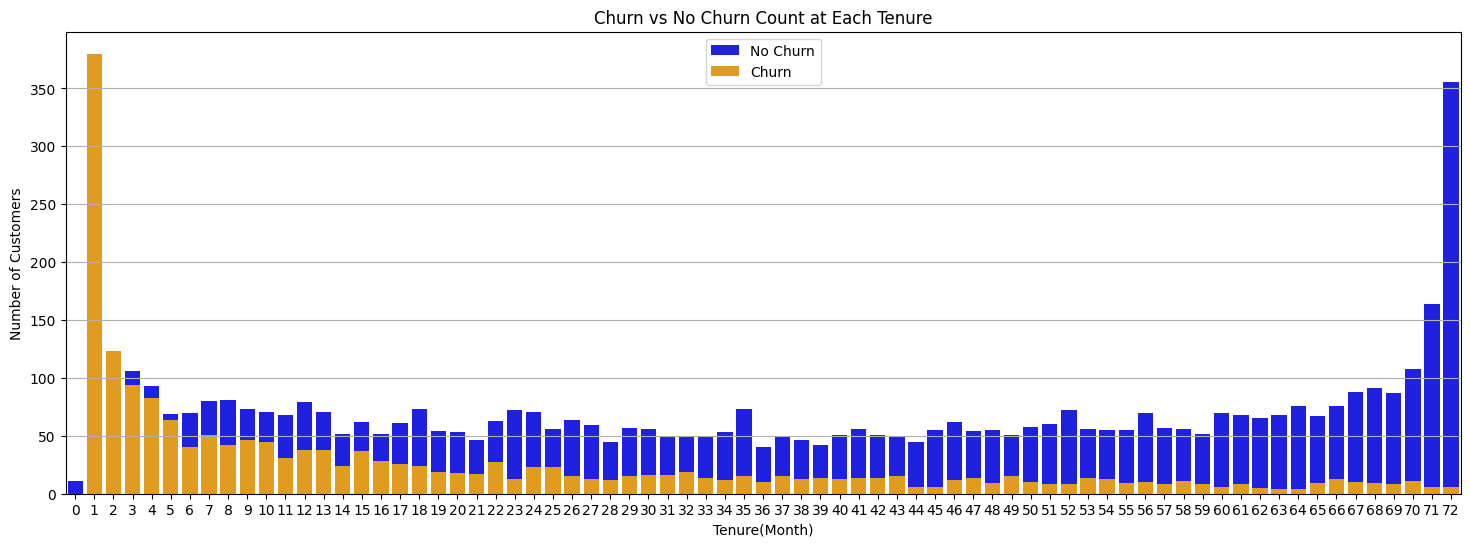

In [144]:
tenure_churn_counts = df.groupby(['tenure', 'Churn']).size().unstack().fillna(0)
tenure_churn_counts.reset_index(inplace=True)

plt.figure(figsize=(18, 6))
sns.barplot(x='tenure', y='No', data=tenure_churn_counts, color='blue', label='No Churn')
sns.barplot(x='tenure', y='Yes', data=tenure_churn_counts, color='orange', label='Churn')
plt.xlabel('Tenure(Month)')
plt.ylabel('Number of Customers')
plt.title('Churn vs No Churn Count at Each Tenure')
plt.legend()
plt.grid(axis='y')
plt.show()

- Grafik menunjukkan pola bahwa jumlah customer yang Churn cenderung lebih tinggi dengan tenure jangka pendek, sedangkan dengan tenur jangka panjang memiliki kemungkinan customer tidak akan churn. 

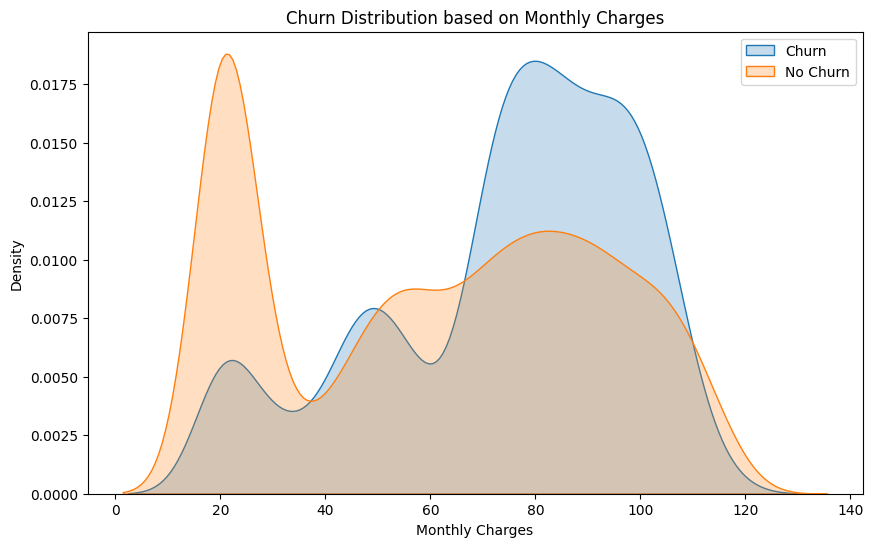

In [145]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn', fill=True)
sns.kdeplot(data=df[df['Churn'] == 'No']['MonthlyCharges'], label='No Churn', fill=True)
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Churn Distribution based on Monthly Charges')
plt.legend()
plt.show()


- check untuk layanan customer yang menggunakan telpon saja
- online service aja
- atau keduanya

dari csutomer tersebut cari yang churn plng bnyk apa? yang bikin dia churn di kelompoknya itu apa

Pada graph dapat dilihat bahwa konsentrasi customer tidak churn paling banyak berada pada 'MonthlyCharges' ~20. Sedangkan Customer yang memiliki 'MonthlyCharges' yang lebih tinggi cenderung memiliki probabilitas untuk Churn yang tinggi.

- check tenure & total month kenapa ada value dibelakang 0 (apakah minus)

In [146]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [147]:
df2 = df.copy()
df2.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'], inplace=True)
df2.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [148]:
# Customers using PhoneService ONLY
phone_service_only = df2[(df2['PhoneService'] == 'Yes') & (df2['InternetService'] == 'No')]
phone_service_only.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No
16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No
21,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No
22,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
33,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No


In [149]:
# Customers using Online Services ONLY
online_services = df2[(df2['InternetService'] != 'No') & (df2['PhoneService'] == 'No')]
online_services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
7,No,No phone service,DSL,Yes,No,No,No,No,No,No
20,No,No phone service,DSL,No,No,Yes,No,No,Yes,Yes
27,No,No phone service,DSL,No,Yes,No,No,No,No,Yes


In [150]:
# Customers using both PhoneService and Online Services
both_services = df2[(df2['PhoneService'] == 'Yes') & (df2['InternetService'] != 'No')]
both_services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
1,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
4,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,No


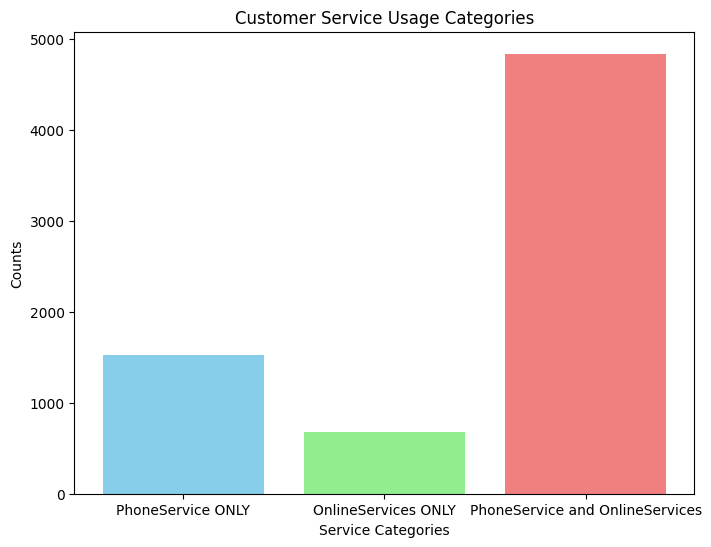

PhoneService ONLY: 1526
OnlineServices ONLY: 682
PhoneService and OnlineServices: 4835


In [151]:
categories = ['PhoneService ONLY', 'OnlineServices ONLY', 'PhoneService and OnlineServices']
counts = [1526, 682, 4835]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Customer Service Usage Categories')
plt.xlabel('Service Categories')
plt.ylabel('Counts')
plt.show()

print("PhoneService ONLY:", len(phone_service_only))
print("OnlineServices ONLY:", len(online_services))
print("PhoneService and OnlineServices:", len(both_services))

In [152]:
# Calculate churn rates for each group
churn_phone_only = phone_service_only['Churn'].value_counts(normalize=True)
churn_online_only = online_services['Churn'].value_counts(normalize=True)
churn_both = both_services['Churn'].value_counts(normalize=True)

print("Churn Rate for PhoneService ONLY:")
print(churn_phone_only)

print("\nChurn Rate for Online Services ONLY:")
print(churn_online_only)

print("\nChurn Rate for Both PhoneService and Online Services:")
print(churn_both)

Churn Rate for PhoneService ONLY:
Churn
No     0.92595
Yes    0.07405
Name: proportion, dtype: float64

Churn Rate for Online Services ONLY:
Churn
No     0.750733
Yes    0.249267
Name: proportion, dtype: float64

Churn Rate for Both PhoneService and Online Services:
Churn
No     0.671975
Yes    0.328025
Name: proportion, dtype: float64


### **Data Splitting**

In [153]:
# Define X and y value 
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=0,
                                                    test_size=0.2, 
                                                    stratify=y)

In [154]:
# Label encode Churn column for train and test sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print(y_train)
print(y_test)

[0 0 0 ... 0 0 0]
[0 0 1 ... 0 0 1]


In [228]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, LabelEncoder

# Apply Label Encoding to all categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Apply Scaling
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    # ('scaler', PowerTransformer(method='yeo-johnson'))
])

transformer = ColumnTransformer([
    ('numeric', StandardScaler(), ['tenure', 'MonthlyCharges', 'TotalCharges'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])])

In [230]:
transformed_df = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
transformed_df.head()

,numeric__tenure,numeric__MonthlyCharges,numeric__TotalCharges,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__PhoneService,remainder__MultipleLines,remainder__InternetService,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__Contract,remainder__PaperlessBilling,remainder__PaymentMethod
0,0.363266,0.193982,0.284356,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0
1,1.016103,-1.515002,-0.514162,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0
2,0.404069,0.715987,0.654827,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0
3,-1.105616,0.699362,-0.821668,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0
4,1.424126,0.042700,0.917910,0.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,3.0


### **Model Selection**

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb  # Corrected import statement for LightGBM

# Initialize models
logreg = LogisticRegression(random_state=24)
dt = DecisionTreeClassifier(random_state=24)
rf = RandomForestClassifier(random_state=24)
xgb = XGBClassifier(random_state=24)
svm = SVC(random_state=24)
gbm = GradientBoostingClassifier(random_state=24)
lgbm = lgb.LGBMClassifier(random_state=24)

### **Model Benchmarking: K-Fold**

In [232]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

models = [
    ('Logistic Regression', logreg),
    ('Decision Tree', dt),
    ('Random Forest', rf),
    ('XGB', xgb),
    ('SVM', svm),
    ('GBM', gbm),
    ('LGBM', lgbm)
]

results = {'Model': [], 'Mean F1-score': [], 'Std': []}

skfold = StratifiedKFold(n_splits=5)

for name, algo in models:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])
    
    model_cv = cross_val_score(estimator = pipe_model, 
                               X = X_train, 
                               y = y_train,
                               cv=skfold,
                               scoring='f1',
                               error_score='raise')
    
    results['Model'].append(name)
    results['Mean F1-score'].append(model_cv.mean())
    results['Std'].append(model_cv.std())

results_df = pd.DataFrame(results)
results_df.sort_values('Mean F1-score', ascending=False)


[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265365 -> initscore=-1.018268
[LightGBM] [Info] Start training from score -1.018268
[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 19
[LightGBM] [Info] [binary:

,Model,Mean F1-score,Std
0,Logistic Regression,0.597437,0.023397
5,GBM,0.580499,0.031061
6,LGBM,0.580203,0.026762
4,SVM,0.559038,0.027147
3,XGB,0.556938,0.021527
2,Random Forest,0.547984,0.038568
1,Decision Tree,0.506646,0.024522


Dari hasil benchmark model, didapat model tertinggi yaitu '**LogisticRegression**'. Berikutnya saya akan mencoba melakukan hyperparameter tuning terhadap model tersebut untuk meningkatkan performa model

### **Hyperparameter Tuning**

Ketika menghadapi data yang tidak seimbang, penting untuk melakukan resampling saat melalukan Hyperparameter Tuning. Terdapat tiga jenis resampling yang dapat digunakan yakni:

- **Oversampling**
Metode ini melibatkan penambahan sample dari kelas yang lebih sedikit untuk menyeimbangkan proporsi kelas

- **Undersampling** 
Pendekatan ini mengurangi jumlah sample dari kelas mayoritas untuk menyeimbangkan distribusi kelas

- **SMOTE (Synthetic Minority Over-sampling Technique)**
membuat sample sintetis berdasarkan sample yang sdah ada 

In [235]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Define the ColumnTransformer with only numeric columns
preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), ['tenure', 'MonthlyCharges', 'TotalCharges'])
], remainder='passthrough')

# Create the logistic regression estimator
logreg = LogisticRegression(random_state=24)

# Define the pipeline with over-sampling, preprocessor, and logistic regression model
pipe_model_logreg = make_imb_pipeline(SMOTE(random_state=24), preprocessor, logreg)

# Define the hyperparameters to tune
param_grid_logreg = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  
    'logisticregression__solver': ['liblinear', 'lbfgs'], 
    'logisticregression__max_iter': [100, 200, 300, 400, 500],
    'logisticregression__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 5}],  
    'logisticregression__random_state': [24]
}

# Define grid search 
gridsearch_logreg = GridSearchCV(
    estimator=pipe_model_logreg,
    param_grid=param_grid_logreg,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    error_score='raise'  # Set error_score to raise for detailed error messages
)

# Fit the grid search for Logistic Regression
gridsearch_logreg.fit(X_train, y_train)

# Get the best hyperparameters and the best F1-score
best_params_logreg = gridsearch_logreg.best_params_
best_score_logreg = gridsearch_logreg.best_score_

print("Best hyperparameters for Logistic Regression:", best_params_logreg)
print("Best F1-score for Logistic Regression:", best_score_logreg)


Best hyperparameters for Logistic Regression: {'logisticregression__C': 0.1, 'logisticregression__class_weight': None, 'logisticregression__max_iter': 100, 'logisticregression__random_state': 24, 'logisticregression__solver': 'lbfgs'}
Best F1-score for Logistic Regression: 0.6179514951867111


In [160]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE


under = RandomUnderSampler(random_state=24)
over = RandomOverSampler(random_state=24)
smote = SMOTE(random_state=24)

### **Logistic Regression**


Merupakan algoritma kalsifikasi dalam machine learning yang digunakan untuk memprediksi probabilitas dari suatu peristiwa dengan dua kemungkinan hasil. Algoritma ini cocok untuk masalah kalsifikasi biner, diaman output yang diprediksi dalam bentuk dua kelas yang berbeda. Logistic Regression kerja dengan cara menghitung probabilitas bahwa sebuah instance data masuk ke dalam salah satu dari dua kelas yang ada berdasarkan fitu-fiturnya. Algoritma ini menggunakan fungsi logistik atau sigmoig untuk mengubah hasil regresi linear menjadi probabilitas, yang memiliki rentang nilai antara 0 dan 1.

Model LogisticRegression dalam machine learning memiliki bebrapa parameter kunci yang dapat dikonfigurasi untuk menoptimalkan kinerjanya. Salah satu parameter yang digunakan dalam project ini adalah 'criterion', untuk menentukan kriteria untuk pemilihan fitur saat membangun pohon keputuan. 'Gini' mengacu pada Gini impurity, sementara 'entropy' mengacu pada information gain.
Berikutnya 'max_depth' untuk menentukan kedalaman maksimum dari pohon keputusan. None berarti tanpa batasan kedalaman. 'min_samples_split' Penjelasan: jumlah minuman sampel yang diperlukan untuk membagi simpul dalam pohon. 'min_samples_leaf' menetukan jumlah sampel yang diperlukan untuk menjadi daun (node) di pohon. Dan 'max_features' untuk menentukan jumlah fitur yang dipertimbangkan saat mencari split terbaik. 'auto' berarti 'max_features=sprt(n_features) dan 'None' berarti mempertimbangkan semua fitur. Dengan mengatur parameter-parameter ini, Anda dapat mengontrol kompleksitas model Decision Tree dan meningkatkan akurasi serta generalisasi pada berbagai tugas klasifikasi. 

In [246]:
from sklearn.model_selection import GridSearchCV

# Define the pipeline with over-sampling, preprocessor, and logistic regression model
pipe_model_logreg = make_imb_pipeline(smote, transformer, logreg)

param_grid_logreg = {
    'logisticregression__C': [0.1, 1, 10],  # Adjust the regularization parameter C
    'logisticregression__solver': ['liblinear', 'lbfgs'], 
    'logisticregression__max_iter': [100, 200, 300],  # Maximum number of iterations
    'logisticregression__class_weight': [None, 'balanced'],  # Handling class imbalance; 'balanced' adjusts weights automatically
    'logisticregression__random_state': [24]  # Seed to control randomness in the model
}

# Define grid search 
gridsearch_logreg = GridSearchCV(
    estimator=pipe_model_logreg,
    param_grid=param_grid_logreg,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    error_score='raise'  # Set error_score to raise for detailed error messages
)

# Fit the grid search for Logistic Regression
gridsearch_logreg.fit(X_train, y_train)

# Best hyperparameters and best F1-score
best_params_logreg = gridsearch_logreg.best_params_
best_score_logreg = gridsearch_logreg.best_score_

print("Best hyperparameters for Logistic Regression:", best_params_logreg)
print("Best F1-score for Logistic Regression:", best_score_logreg)

Best hyperparameters for Logistic Regression: {'logisticregression__C': 0.1, 'logisticregression__class_weight': None, 'logisticregression__max_iter': 100, 'logisticregression__random_state': 24, 'logisticregression__solver': 'lbfgs'}
Best F1-score for Logistic Regression: 0.6179514951867111


In [241]:
pd.DataFrame(gridsearch_logreg.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__class_weight,param_logisticregression__max_iter,param_logisticregression__random_state,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.127520,0.015094,0.012270,0.002268,0.1,None,100,24,lbfgs,"{'logisticregression__C': 0.1, 'logisticregres...",0.631724,0.607345,0.636364,0.614325,0.6,0.617951,0.013976,1
11,0.169380,0.043814,0.016244,0.006483,0.1,balanced,300,24,lbfgs,"{'logisticregression__C': 0.1, 'logisticregres...",0.631724,0.607345,0.636364,0.614325,0.6,0.617951,0.013976,1
3,0.142245,0.010830,0.013397,0.002067,0.1,None,200,24,lbfgs,"{'logisticregression__C': 0.1, 'logisticregres...",0.631724,0.607345,0.636364,0.614325,0.6,0.617951,0.013976,1
5,0.144122,0.011003,0.010985,0.001202,0.1,None,300,24,lbfgs,"{'logisticregression__C': 0.1, 'logisticregres...",0.631724,0.607345,0.636364,0.614325,0.6,0.617951,0.013976,1
9,0.192627,0.013509,0.018040,0.013968,0.1,balanced,200,24,lbfgs,"{'logisticregression__C': 0.1, 'logisticregres...",0.631724,0.607345,0.636364,0.614325,0.6,0.617951,0.013976,1


### **Decision Tree Classifier Second Tuning**

In [247]:
# Create the logistic regression estimator
logreg = LogisticRegression()

# Define the pipeline with over-sampling, preprocessor, and logistic regression model
pipe_model_logreg = make_imb_pipeline(smote, transformer, logreg)

param_grid_logreg = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    'logisticregression__max_iter': [100, 200, 300, 400, 500],
    'logisticregression__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 5}],
    'logisticregression__random_state': [24]
}

# Define grid search
gridsearch_logreg_2 = GridSearchCV(
    estimator=pipe_model_logreg,
    param_grid=param_grid_logreg,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    error_score='raise'
)

# Fit the grid search for Logistic Regression
gridsearch_logreg_2.fit(X_train, y_train)

# Best hyperparameters and best F1-score
best_params_logreg = gridsearch_logreg_2.best_params_
best_score_logreg = gridsearch_logreg_2.best_score_

print("Best hyperparameters for Logistic Regression:", best_params_logreg)
print("Best F1-score for Logistic Regression:", best_score_logreg)

Best hyperparameters for Logistic Regression: {'logisticregression__C': 0.1, 'logisticregression__class_weight': None, 'logisticregression__max_iter': 100, 'logisticregression__random_state': 24, 'logisticregression__solver': 'lbfgs'}
Best F1-score for Logistic Regression: 0.6179514951867111


In [257]:
from sklearn.metrics import classification_report

# Use the best estimator from grid search to make predictions on test data
best_model = gridsearch_logreg.best_estimator_
y_pred = best_model.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


ValueError: could not convert string to float: 'Female'

### **Model Benchmarking: Test Data**

In [94]:
from sklearn.metrics import classification_report, f1_score

models = [
    ('Logistic Regression', logreg),
    ('Decision Tree', dt),
    ('Random Forest', rf),
    ('XGB', xgb),
    ('SVM', svm),
    ('GBM', gbm),
    ('LGBM', lgbm)
]

f1_scores = []

trained_models = {}
for name, algo in models:
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])
    estimator.fit(X_train, y_train)
    trained_models[name] = estimator

# Evaluate models on the test data and collect F1 scores
test_results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    test_results[name] = classification_report(y_test, y_pred, output_dict=True)
    f1_scores.append(test_results[name]['weighted avg']['f1-score'])

# Display classification reports for each model
for name, report in test_results.items():
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, trained_models[name].predict(X_test)))
    print("--------------------------------------------------------")

results_df = pd.DataFrame({'Model': [name for name, _ in models], 
                           'F1 Score': f1_scores}).set_index('Model').sort_values(by='F1 Score', ascending=False)
print("\nF1 Scores for each model:")
results_df

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

--------------------------------------------------------
Classification 

,F1 Score
Model,
Logistic Regression,0.796473
GBM,0.793160
SVM,0.787453
LGBM,0.786400
Random Forest,0.784873
XGB,0.769362
Decision Tree,0.743941


References: 
- Prabadevi, B., Shalini, R. and Kavitha, B.R. (2023) ‘Customer churning analysis using machine learning algorithms’, International Journal of Intelligent Networks, 4, pp. 145–154. doi:10.1016/j.ijin.2023.05.005.

- https://scholarship.libraries.rutgers.edu/esploro/outputs/journalArticle/Telecom-customer-churn-prediction/991031550004604646